# HW1-A. Dataset and Dataloader for our HW1

## About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (01/02/2024)

**Requirements:**
- Python 3
- Matplotlib
- Numpy
- Pandas
- Torch
- Torchmetrics

## 0. Imports and CUDA

In addition to the libraries mentioned above, you will need the *helper_functions.py* file, which contains a few additional functions that help make this notebook simpler for you (e.g. visualisation, test cases, etc.)

Please refrain from modifying said file, but feel free to have a look at it.

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics.classification import BinaryAccuracy
# Helper functions (additional file)
from helper_functions import *
#from hidden_functions import *

/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


While not necessary, you might want to run the code for this homework using GPU. It remains possible, however, to use CPU only.

In [2]:
# Use GPU if available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## 0. Dataset Excel file generation

Please ignore this Section 0, it was used to generate the dataset you are going to play with in the future tasks.

In [ ]:
#min_val = -1
#max_val = 1
#a = 0.1
#b = 0.1
#c = 1
#n_points = 1024
#np.random.seed(17)
#val1_list, val2_list, inputs, outputs = create_dataset(n_points, min_val, max_val, a, b)
#save_dataset(val1_list, val2_list, outputs, excel_file_path = 'dataset.xlsx')

In [ ]:
#min_val = -1
#max_val = 1
#a = 0.1
#b = 0.1
#c = 1
#n_points = 128
#np.random.seed(27)
#val1_list, val2_list, inputs, outputs = create_dataset(n_points, min_val, max_val, a, b)
#save_dataset(val1_list, val2_list, outputs, excel_file_path = 'unseen_dataset.xlsx')

## 1. Loading and visualizing the dataset

In this first section, we are going to load a dataset from the *'dataset.xlsx'* file.

Feel free to have a look at this Excel file if you need.

The cells below will define the parameters of our dataset, and load the data from the file.

In [3]:
# Dataset parameters
np.random.seed(17)
min_val = -1
max_val = 1
n_points = 1024

In [4]:
# Load dataset from file
excel_file_path = 'dataset.xlsx'
val1_list, val2_list, inputs, outputs = load_dataset(excel_file_path = 'dataset.xlsx')

In [5]:
# Visualize data in arrays
print(inputs.shape, outputs.shape)
print("Number of samples with class 0:", len(outputs) - sum(outputs))
print("Number of samples with class 1:", sum(outputs))

(1024, 2) (1024,)
Number of samples with class 0: 485
Number of samples with class 1: 539


In [6]:
print(inputs[384])
print(outputs[0])

[ 0.97000003 -0.03      ]
0


The visualization below shows the samples in the dataset, along with their ground truth class (red cross = 1, green dot = 0).

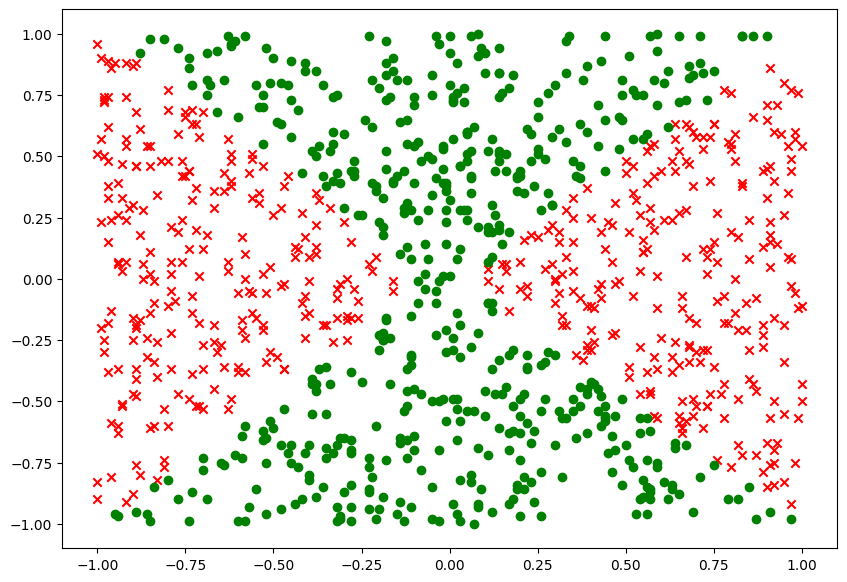

In [7]:
# Visualize the dataset
plot_dataset(min_val, max_val, val1_list, val2_list, outputs)

**Question 1:** Given the code executed above, can you describe the different elements of the Machine Learning problem that we seem to be currently facing? At the moment you should be able to describe the task (T), dataset (D), inputs and outputs (I, O). The model (M) and loss (L) will be discussed later.


**Question 2:** Could we use a simple Logistic Regression model to solve this Machine Learning task?


## 2. Writing a PyTorch Dataset object

Right now, we would like to write a *PyTorch Dataset* object for our Machine Learning problem.

Have a look at the incomplete code below, you will recognize that there are several None variables (called *None1*, *None2*, etc.). These variables probably need to be replaced with something else.

Once you have figured out the correct values to use in place of the None variables, you should be able to run the function *test_dataset_oject()* below. It will produce two test cases for you, and both should pass for this task to be considered resolved.

You class is expected to have the following features.
- Initialization (__init__ method): The dataset initializes by reading an Excel file (dataset.xlsx) using Pandas read_excel function and stores it in the dataframe attribute.
- Length method (__len__ method): This method should return a certain information about the dataset.
- Get item method (__getitem__ method): This method is called when you index into the dataset (e.g., dataset[idx]). It retrieves a single sample from the dataset at the given index idx. It extracts the features x1 and x2 along with the target y from the dataframe for the sample corresponding to the specified index. The features x1 and x2 should be converted into PyTorch tensors of type torch.float64. The target y should also be converted into a PyTorch tensor of type torch.float64. The features should then be stacked together into a single tensor inputs with 2 columns and rows for each sample. Finally, this method should return two values corresponding to the input features tensor inputs and the target tensor y.

In [10]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.dataframe = pd.read_excel('dataset.xlsx')
        self.dataset_length= len(self.dataframe)

        self.input_features= self.dataframe.iloc[:, :2]
        self.output_label= self.dataframe.iloc[:, 2]
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        # Select columns corresponding to the different inputs and outputs from the dataframe we just created.
        # And convert to PyTorch tensors with the right dtype
        x1 = torch.tensor(self.dataframe.iloc[idx, 0], dtype=torch.float64)
        x2 = torch.tensor(self.dataframe.iloc[idx, 1], dtype=torch.float64)
        y = torch.tensor(self.dataframe.iloc[idx, 2], dtype=torch.float64)
        # Assemble all input features in a single inputs tensor with 2 columns and rows for each sample in the dataset.
        inputs = torch.stack((x1, x2), dim=0)
        y= y
        return inputs, y

In [11]:
# Create our PyTorch Dataset object from the class above
pt_dataset = CustomDataset()

In [12]:
# Running test function for our dataset object
test_dataset_oject(pt_dataset)

--- Test case 1 (dataset): Implemented the correct __getitem__ method.
Sample with index 384 was drawn from dataset.
Retrieved: (tensor([ 0.9700, -0.0300], dtype=torch.float64), tensor(0., dtype=torch.float64))
Expected: (tensor([0.9700, 0.7500]), tensor(0.))
Test case 1: Failed
--- Test case 2 (dataset): Implemented the correct __len__ method.
Asking for dataset length.
Retrieved: 1024
Expected: 1024
Test case 2: Passed


**Question 3:** Show the code for your CustomDataset object, after you have correctly figured out how to replace the different None variables.



**Question 4:** What information about the dataset is the *len* method supposed to return?


## 3. Writing a Dataloader object

Our next task is now to write a PyTorch dataloader object. It will serve as a conveyor belt for our PyTorch dataset object in the previous section.

Its objective will be to form mini-batches of size 128, shuffling the samples in the dataset.

**Question 6:** Can you figure out what to put in place of the None variables in the cell below? Show your code in your report. 

In [13]:
# Define batch size
batch_size = 128

In [14]:
# Create DataLoader object
pt_dataloader = torch.utils.data.DataLoader(pt_dataset, batch_size= batch_size, shuffle=True)

If you have correctly figured out the code for the cell above, the test cases checked by the function *test_dataloader_oject()* should all pass.

In [15]:
# Running test function for our dataloader object
test_dataloader_oject(pt_dataloader)

--- Test case 1 (dataloader): Using the correct batch size.
Asking for batch size.
Retrieved: 128
Expected: 128
Test case 1: Passed
--- Test case 2 (dataloader): Dataloader is shuffling the dataset, as requested.
Asking if Dataloader will be shuffling.
Retrieved: True
Expected: True
Test case 2: Passed


## What is next?

Our task continues in the Notebook 1-B.